In [1]:
import yaml
from linkml.generators import shaclgen, owlgen
from linkml.validator import validate

from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [2]:
with open('/Users/maximilianstaebler/code/DLR/GX4FM-Base-X/SemanticDataLink/linkml/roaddamage.yaml', 'r') as file:
    input_yaml = yaml.safe_load(file)

shaclGraph = shaclgen.ShaclGenerator(str(input_yaml)).as_graph()
owlGraph = owlgen.OwlSchemaGenerator(str(input_yaml)).as_graph()

print(shaclGraph.serialize())
print(owlGraph.serialize())

# metamodel_version: 1.7.0
@prefix base-x: <http://www.base-x/model/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix sh: <http://www.w3.org/ns/shacl#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

base-x:Roaddamage a sh:NodeShape ;
    sh:closed true ;
    sh:ignoredProperties ( rdf:type ) ;
    sh:name "Road damage" ;
    sh:property [ sh:datatype xsd:string ;
            sh:maxCount 1 ;
            sh:minCount 1 ;
            sh:name "type" ;
            sh:order 0 ;
            sh:path base-x:type ],
        [ sh:datatype xsd:float ;
            sh:description "Heading information." ;
            sh:maxCount 1 ;
            sh:minCount 1 ;
            sh:name "heading" ;
            sh:order 5 ;
            sh:path base-x:heading ],
        [ sh:datatype xsd:dateTime ;
            sh:description "At what time this situation was last observed." ;
            sh:maxCount 1 ;
            sh:minCount 1 ;
            sh:name "last observation" ;
          

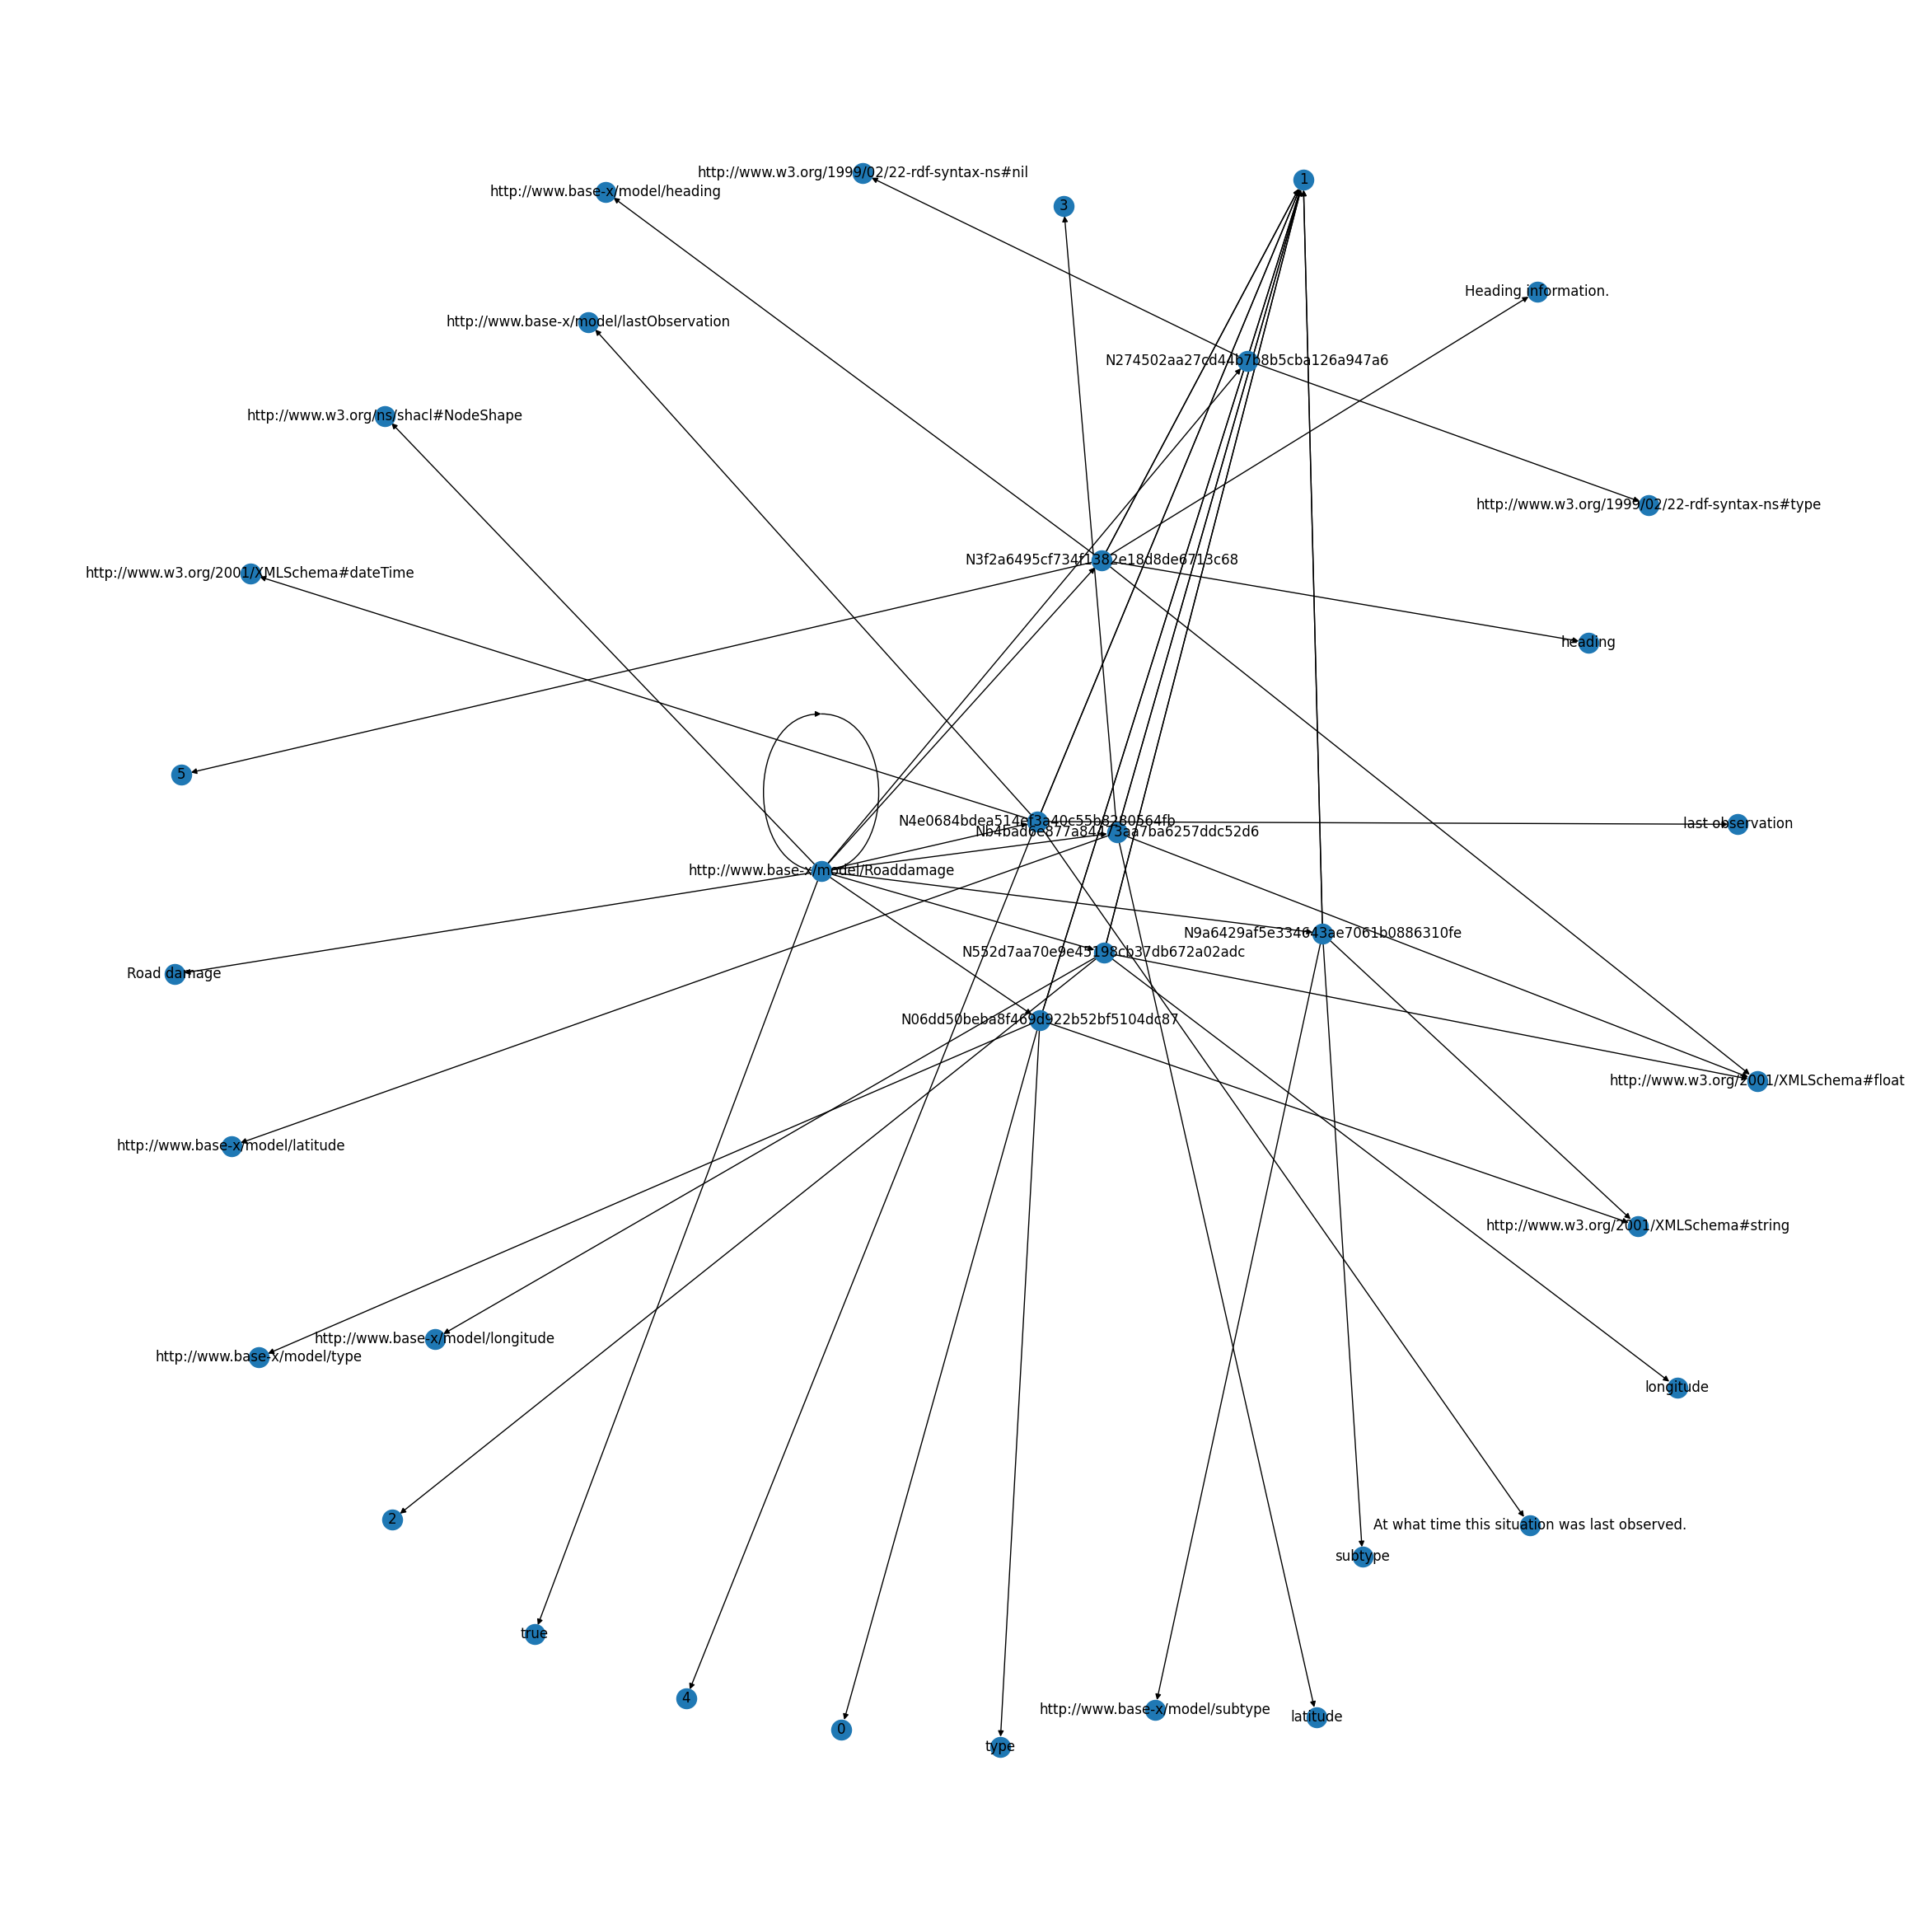

In [3]:
G = rdflib_to_networkx_multidigraph(shaclGraph)

plt.figure(figsize=(30,30))

# Plot Networkx instance of RDF Graph
pos = nx.spring_layout(G, scale=2)
edge_labels = nx.get_edge_attributes(G, 'r')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

nx.draw(G, with_labels=True)

#if not in interactive mode for 
plt.show()

In [10]:
# Sample DataFrame
df = pd.DataFrame({
    'ColumnA': [1, 2, 3, 4],
    'ColumnB': ['a', 'b', 'c', 'd']
})

# Condition: ColumnA equals 3
result = df.loc[df['ColumnA'] == 3, 'ColumnB'].iloc[0]
result

'c'

In [8]:
payload = {'q': 'latitude'}
r = requests.get('https://lov.linkeddata.es/dataset/lov/api/v2/term/search', params=payload)
lov = r.json()

In [9]:
df = pd.DataFrame(lov['results'])
df = df[['prefixedName', 'uri', 'score', 'type']]
df['uri'] = df['uri'].apply(lambda x: x[0])
df['prefixedName'] = df['prefixedName'].apply(lambda x: x[0])
df

,prefixedName,uri,score,type
0,geo:lat,http://www.w3.org/2003/01/geo/wgs84_pos#lat,0.940842,property
1,og:latitude,http://ogp.me/ns#latitude,0.555555,property
2,vcard:latitude,http://www.w3.org/2006/vcard/ns#latitude,0.549576,property
3,identity:latitude,http://www.identity.org/ontologies/identity.ow...,0.517205,property
4,geo:long,http://www.w3.org/2003/01/geo/wgs84_pos#long,0.509836,property
5,cpmeta:hasLatitude,http://meta.icos-cp.eu/ontologies/cpmeta/hasLa...,0.453536,property
6,schema:latitude,http://schema.org/latitude,0.453536,property
7,atts:latitude,https://data.nasa.gov/ontologies/atmonto/gener...,0.453536,property
8,ebucore:locationLatitude,http://www.ebu.ch/metadata/ontologies/ebucore/...,0.445355,property
9,rico:latitude,https://www.ica.org/standards/RiC/ontology#lat...,0.445355,property


In [1]:
from rdflib import Graph, Literal, RDF, URIRef
# rdflib knows about quite a few popular namespaces, like W3C ontologies, schema.org etc.
from rdflib.namespace import FOAF , XSD

# Create a Graph
g = Graph()

# Create an RDF URI node to use as the subject for multiple triples
donna = URIRef("http://example.org/donna")

# Add triples using store's add() method.
g.add((donna, RDF.type, FOAF.Person))
g.add((donna, FOAF.nick, Literal("donna", lang="en")))
g.add((donna, FOAF.name, Literal("Donna Fales")))
g.add((donna, FOAF.mbox, URIRef("mailto:donna@example.org")))

# Add another person
ed = URIRef("http://example.org/edward")

# Add triples using store's add() method.
g.add((ed, RDF.type, FOAF.Person))
g.add((ed, FOAF.nick, Literal("ed", datatype=XSD.string)))
g.add((ed, FOAF.name, Literal("Edward Scissorhands")))
g.add((ed, FOAF.mbox, Literal("e.scissorhands@example.org", datatype=XSD.anyURI)))

# Iterate over triples in store and print them out.
print("--- printing raw triples ---")
for s, p, o in g:
    print((s, p, o))

# For each foaf:Person in the store, print out their mbox property's value.
print("--- printing mboxes ---")
for person in g.subjects(RDF.type, FOAF.Person):
    for mbox in g.objects(person, FOAF.mbox):
        print(mbox)

# Bind the FOAF namespace to a prefix for more readable output
g.bind("foaf", FOAF)

# print all the data in the Notation3 format
print("--- printing mboxes ---")
print(g.serialize(format='n3'))

--- printing raw triples ---
(rdflib.term.URIRef('http://example.org/donna'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/Person'))
(rdflib.term.URIRef('http://example.org/edward'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/Person'))
(rdflib.term.URIRef('http://example.org/edward'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/nick'), rdflib.term.Literal('ed', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')))
(rdflib.term.URIRef('http://example.org/donna'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/name'), rdflib.term.Literal('Donna Fales'))
(rdflib.term.URIRef('http://example.org/donna'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/nick'), rdflib.term.Literal('donna', lang='en'))
(rdflib.term.URIRef('http://example.org/donna'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/mbox'), rdflib.term.URIRef('mailto:do

In [8]:
def is_key_present_in_dict(target_key, d):
    """
    Recursively checks if target_key is present in the dictionary d.

    Args:
    - target_key (str): The key to search for.
    - d (dict): The dictionary to search in.

    Returns:
    - bool: True if target_key is found in d, False otherwise.
    """
    if target_key in d:
        return True
    
    for key, value in d.items():
        if isinstance(value, dict):  # If the value is another dictionary, search recursively
            if is_key_present_in_dict(target_key, value):
                return True
    return False

# Example usage
nested_dict = {
    'level1': {
        'level2': {
            'level3': 'value'
        }
    },
    'another_level1': {
        'target_key': 'found me!'
    }
}

print(is_key_present_in_dict('target_key', nested_dict))  # Output: True
print(is_key_present_in_dict('missing_key', nested_dict))  # Output: False

True
False


In [9]:
def find_subdict_by_value(d, target_key, target_value):
    """
    Searches a nested dictionary for a top-level key with a specific value.
    Returns the sub-dictionary rooted at the matching key-value pair.

    Args:
    - d (dict): The nested dictionary to search.
    - target_key (str): The key associated with the target value.
    - target_value: The target value to search for.

    Returns:
    - dict: The sub-dictionary starting from the matching key-value pair, or
            an empty dict if no match is found.
    """
    # Check if the current level of the dictionary contains the target_key with the target_value
    if target_key in d and d[target_key] == target_value:
        return d
    
    # Recursively search in nested dictionaries
    for key, value in d.items():
        if isinstance(value, dict):
            result = find_subdict_by_value(value, target_key, target_value)
            if result:  # If a matching sub-dictionary is found
                return {key: result}
    
    return {}  # Return an empty dict if no match is found

# Example usage
nested_dict = {
    'user1': {
        'name': 'John',
        'age': 30,
        'details': {
            'hobbies': ['reading', 'cycling'],
            'location': 'New York'
        }
    },
    'user2': {
        'name': 'Jane',
        'age': 25,
        'details': {
            'hobbies': ['painting', 'swimming'],
            'location': 'London'
        }
    }
}

# Searching for a sub-dictionary by a specific value
print(find_subdict_by_value(nested_dict, 'name', 'Jane'))


{'user2': {'name': 'Jane', 'age': 25, 'details': {'hobbies': ['painting', 'swimming'], 'location': 'London'}}}


In [10]:
def find_top_level_keys_with_value(target_value, d, target_key):
    """
    Searches through a dictionary for any nested dictionaries that have
    a specific key with a given value and returns the top-level keys under
    which these matching nested dictionaries are found.

    Args:
    - target_value: The value to search for.
    - d (dict): The dictionary to search in.
    - target_key: The key in nested dictionaries to check the value of.

    Returns:
    - list: A list of top-level keys from the dictionary d under which
            a nested dictionary contains the target_key with the matching target_value.
    """
    matching_keys = []

    def search_dict(current_dict, current_path=None):
        nonlocal matching_keys
        for key, value in current_dict.items():
            if isinstance(value, dict):
                # If this nested dict contains the target key with the matching value,
                # add the top-level key (the first in the current path) to the results
                if target_key in value and value[target_key] == target_value:
                    if current_path:
                        matching_keys.append(current_path[0])
                    else:
                        matching_keys.append(key)
                    # Do not search further within this dict to stick with the top-level match
                    continue
                # Otherwise, recursively search within this dict
                search_dict(value, current_path + [key] if current_path else [key])

    # Start searching with the initial dictionary and no path
    search_dict(d)

    return list(set(matching_keys))  # Remove duplicates if any

# Example usage
nested_dict = {
    'item1': {
        'details': {
            'color': 'blue',
            'size': 'large'
        }
    },
    'item2': {
        'details': {
            'color': 'red',
            'size': 'medium'
        },
        'more_details': {
            'color': 'blue'
        }
    },
    'item3': {
        'details': {
            'color': 'blue',
            'size': 'small'
        }
    }
}

print(find_top_level_keys_with_value('blue', nested_dict, 'color'))  # Expected output: ['item1', 'item2', 'item3']


['item2', 'item1', 'item3']


In [11]:
good_instance = {
    "id": "ORCID:1234",
    "full_name": "Clark Kent",
    "age": 32,
    "phone": "555-555-5555"
}

bad_instance = {
    "id": "ORCID:1234",
    "full_name": "Clark Kent",
    "age": 32,
    "phone": "555-555-5555",
    "test": "asdksjdskd"
}

In [12]:
def check_instance(instance):
    report = validate(
        instance, "/Users/maximilianstaebler/code/DLR/GX4FM-Base-X/SemanticDataLink/linkml/yaml/personinfo.yaml", "Person"
    )

    if not report.results:
        print('The instance is valid!')
    else:
        for result in report.results:
            print(result.message)

In [13]:
check_instance(good_instance)
check_instance(bad_instance)

The instance is valid!
The instance is valid!


In [15]:
import linkml_datalog

linkml_datalog

AttributeError: module 'linkml_datalog' has no attribute 'engines'

# Add attributes to existing graphs

In [20]:
from rdflib import URIRef, Literal, Namespace
from rdflib.namespace import RDF, RDFS
from rdflib import Graph, Namespace, RDF, RDFS, OWL, URIRef, Literal, XSD
import yaml
from linkml.generators.shaclgen import ShaclGenerator
from linkml.generators.owlgen import OwlSchemaGenerator
import rdflib


# Assuming `shacl_graph` and `owl_graph` are your RDFlib Graph objects from LinkML generators
# For demonstration, let's create empty graphs (replace these with your actual graph objects)

shacl_graph = shaclgen.ShaclGenerator(str(input_yaml)).as_graph()
owl_graph = owlgen.OwlSchemaGenerator(str(input_yaml)).as_graph()

# Define a namespace for your nodes and attributes
MYNS = Namespace("http://base-x-ecosystem.com/base-x-core/")

# Function to add a node and attribute to a graph
def add_node_and_attribute(graph, node_uri, attribute_uri, attribute_value):
    node = URIRef(node_uri)
    attribute = URIRef(attribute_uri)
    value = Literal(attribute_value)
    
    # Add the node to the graph if not already present
    if (node, None, None) not in graph:
        graph.add((node, RDF.type, RDFS.Resource))
    
    # Add or update the attribute for the node
    graph.add((node, attribute, value))

# Example usage - Adding a node with an attribute to both graphs
node_uri = MYNS['exampleNode']
attribute_uri = MYNS['exampleAttribute']
attribute_value = "This is an example value"

add_node_and_attribute(shacl_graph, node_uri, attribute_uri, attribute_value)
add_node_and_attribute(owl_graph, node_uri, attribute_uri, attribute_value)

# Optionally, print out the graphs to verify (for demonstration purposes)
print(shacl_graph.serialize(format="turtle"))
print('#'*30)
print()
print(owl_graph.serialize(format="turtle"))


# metamodel_version: 1.7.0
@prefix base-x: <http://www.base-x/model/> .
@prefix ns1: <http://base-x-ecosystem.com/base-x-core/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix sh: <http://www.w3.org/ns/shacl#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ns1:exampleNode a rdfs:Resource ;
    ns1:exampleAttribute "This is an example value" .

base-x:Roaddamage a sh:NodeShape ;
    sh:closed true ;
    sh:ignoredProperties ( rdf:type ) ;
    sh:name "Road damage" ;
    sh:property [ sh:datatype xsd:float ;
            sh:maxCount 1 ;
            sh:minCount 1 ;
            sh:name "latitude" ;
            sh:order 3 ;
            sh:path base-x:latitude ],
        [ sh:datatype xsd:float ;
            sh:maxCount 1 ;
            sh:minCount 1 ;
            sh:name "longitude" ;
            sh:order 2 ;
            sh:path base-x:longitude ],
        [ sh:datatype xsd:float ;
            sh:description

In [21]:
import re

def clean_text(text):
    # Remove all punctuation except commas
    text = re.sub(r'[^\w\s,]', '', text)
    
    # Replace any whitespace (of any size) with one underscore
    text = re.sub(r'\s+', '_', text)
    
    return text

# Example usage
original_text = "Hello, world! This is a test.    Spaces and punctuation, except commas, will be removed."
cleaned_text = clean_text(original_text)

print("Original Text:", original_text)
print("Cleaned Text:", cleaned_text)

Original Text: Hello, world! This is a test.    Spaces and punctuation, except commas, will be removed.
Cleaned Text: Hello,_world_This_is_a_test_Spaces_and_punctuation,_except_commas,_will_be_removed
